# CH 1

In [9]:
%notebook widget

In [14]:
#RUnning of the basic tutorial
from ase import Atoms
atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
from ase.visualize import view
v = view(atoms, viewer='ngl')
v.view.center_view()

v.custom_colors({'H':'green','As':'blue'})
v.view._remote_call("setSize", target="Widget", args=["400px", "400px"])
v.view.center_view()
v.view.background='#ffc'
v.view.parameters=dict(clipDist=-200)


# saving the atoms
from ase.io import write
write('firstraj.traj', atoms)

In [11]:
v
view(atoms, viewer='ngl')

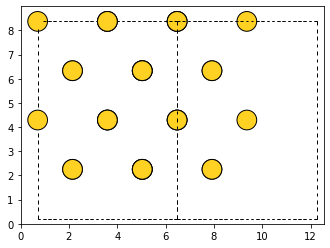

In [12]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.lattice.cubic import FaceCenteredCubic
slab = FaceCenteredCubic('Au', size=(2, 2, 2))
fig, ax = plt.subplots()
plot_atoms(slab, ax, radii=0.3, rotation=('90x,45y,0z'))
fig.savefig("ase_slab.png")

In [25]:
from gpaw import GPAW

calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt', xc='LDA')
atoms.calc = calc
atoms.center(vacuum=3.0)
print(atoms)

Atoms(symbols='N2', pbc=False, cell=[6.0, 6.0, 11.0], calculator=GPAW(...))


In [26]:
e = atoms.get_potential_energy()
print('Energy', e)
f = atoms.get_forces()
print('Forces')
print(f)

atoms.get_positions()

atoms.set_positions([[3,3,3],[3,3,8]])
#e2 = atoms.get_potential_energy()
#print(e2)

Energy 1.2705076184267976
Forces
[[ 0.          0.          0.34855236]
 [ 0.          0.         -0.34855236]]


In [16]:
# import nglview as nv
# nv.demo()


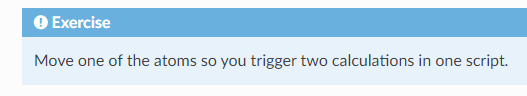

In [52]:
from gpaw import GPAW
from ase.visualize import view
from ase import Atoms

atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt', xc='LDA')
atoms.calc = calc
atoms.center(vacuum=3.0)
#view(atoms, viewer = 'ngl')

e = atoms.get_potential_energy()
print(atoms)
print(atoms.positions)
print(e)
#calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt', xc='LDA')
#atoms.calc = calc
#atoms.positions = [[0, 0, -1], [0, 0, 2]]
atoms[1].z = 4
print(atoms.positions)
atoms.center(vacuum = 3.0)
#view(atoms, viewer = 'ngl')
#e2 = atoms.get_potential_energy()
#print(e2)

e2 = atoms.get_potential_energy()
print(e2)



Atoms(symbols='N2', pbc=False, cell=[6.0, 6.0, 8.0], calculator=GPAW(...))
[[3. 3. 3.]
 [3. 3. 5.]]
-5.164615584409899
[[3. 3. 3.]
 [3. 3. 4.]]
-14.42648582363853


In [4]:



from gpaw import GPAW
from ase.visualize import view
from ase import Atoms
import matplotlib.pyplot as plt

dist_vect = []
Evec = []
atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
atoms.center(vacuum=3.0)
calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt', xc='LDA')
atoms.calc = calc

max_disp = 4
displacement = 0
num_points = 10
stepsize = max_disp/num_points

while displacement < max_disp:
    
    displacement += stepsize
    print(f'displacement {displacement}')
    
    atoms.positions = [[0, 0, -1], [0, 0, 0 + displacement]]
    atoms.center(vacuum=3)
    #dist_vect.append(atoms.positions[1,2]-atoms.positions[0,2])
    #Evec.append(atoms.get_potential_energy())

print(Evec)
print(dist_vect)




displacement 0.4
displacement 0.8
displacement 1.2000000000000002
displacement 1.6
displacement 2.0
displacement 2.4
displacement 2.8
displacement 3.1999999999999997
displacement 3.5999999999999996
displacement 3.9999999999999996
displacement 4.3999999999999995
[]
[]


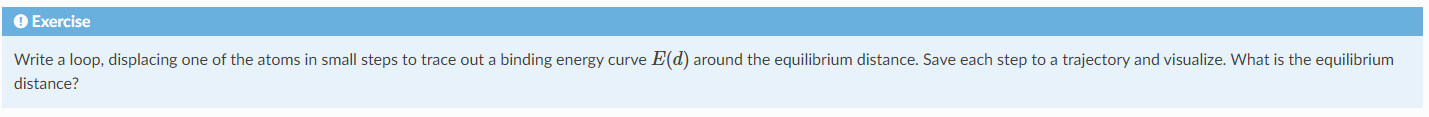

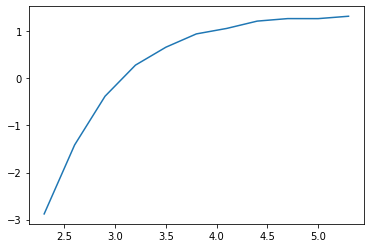

In [6]:
plt.plot(dist_vect, Evec)
plt.show()

distance, energy 0.5 139.70897530268766
force [[ 0.0000000e+00  0.0000000e+00 -9.8318282e+02]
 [ 5.0706073e-30  0.0000000e+00  9.8318282e+02]]
distance, energy 0.55 96.4202580543726
force [[-2.02824292e-29  6.08472876e-29 -7.54188184e+02]
 [ 2.02824292e-29 -6.08472876e-29  7.54188184e+02]]
distance, energy 0.6 63.67999879775285
force [[ 1.01412146e-28  1.01412146e-28 -5.62551378e+02]
 [ 4.05648584e-29  4.05648584e-29  5.62551378e+02]]
distance, energy 0.65 39.510211235035484
force [[   0.            0.         -411.01961195]
 [   0.            0.          411.01961195]]
distance, energy 0.7 21.987774367561816
force [[ 0.00000000e+00 -1.01412146e-29 -2.95650296e+02]
 [-1.01412146e-29 -2.02824292e-29  2.95650296e+02]]
distance, energy 0.75 9.46060707347872
force [[ 8.11297168e-29  0.00000000e+00 -2.10094750e+02]
 [ 6.08472876e-29 -2.02824292e-29  2.10094750e+02]]
distance, energy 0.8 0.6075505938950115
force [[   0.            0.         -147.47181094]
 [   0.            0.          147.

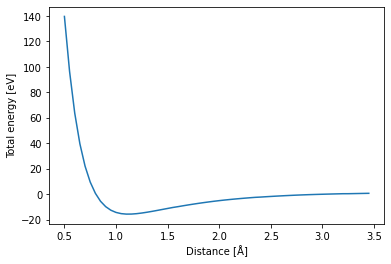

In [2]:
from ase import Atoms
from ase.io import Trajectory
from gpaw import GPAW

atoms = Atoms('N2', positions=[[0, 0, -1], [0, 0, 1]])
atoms.center(vacuum=3.0)

calc = GPAW(mode='lcao', basis='dzp', txt='gpaw.txt')
atoms.calc = calc

traj = Trajectory('binding_curve.traj', 'w')

step = 0.05
nsteps = int(3 / step)

for i in range(nsteps):
    d = 0.5 + i * step
    atoms.positions[1, 2] = atoms.positions[0, 2] + d
    atoms.center(vacuum=3.0)
    e = atoms.get_potential_energy()
    f = atoms.get_forces()
    print('distance, energy', d, e)
    #print('force', f)
    traj.write(atoms)

import matplotlib.pyplot as plt
from ase.io import iread

energies = []
distances = []

for atoms in iread('binding_curve.traj'):
    energies.append(atoms.get_potential_energy())
    distances.append(atoms.positions[1, 2] - atoms.positions[0, 2])

ax = plt.gca()
ax.plot(distances, energies)
ax.set_xlabel('Distance [Å]')
ax.set_ylabel('Total energy [eV]')
plt.show()

# CH 2

In [10]:
from myqueue.task import task
task('./Calculation_energy.py', tmax='2d', cores=8).submit()